In [1]:
# Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Graphic libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Initialization
sns.set()

url = "https://github.com/renatoquiliche/Insurance-Mathematics-Economics-ADR/blob/main/Databases/insurance.csv?raw=true"

data_insurance = pd.read_csv(url)

# Data pre-processing

In [3]:
categorical = pd.get_dummies(data_insurance[["sex","smoker"]]) 
numerical = data_insurance[["age","bmi","children", "charges"]]

scaler = MinMaxScaler()

#Escalamos la data numerica a la escala de la binaria
numerical_data_scaled = pd.DataFrame(scaler.fit_transform(numerical), columns=["age","bmi","children", "charges"])

#Unimos los dos tipos de data
final_data_scaled = pd.concat([numerical_data_scaled, categorical], axis=1)

In [4]:
tsne = TSNE(n_components=2, perplexity=50, n_iter=1000, early_exaggeration=12,
            init='pca', learning_rate='auto', method='barnes_hut', n_jobs=-1)
vecs_list_tsne = tsne.fit_transform(final_data_scaled)

print("Training error: ", tsne.kl_divergence_)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Training error:  0.41560491919517517


<AxesSubplot:>

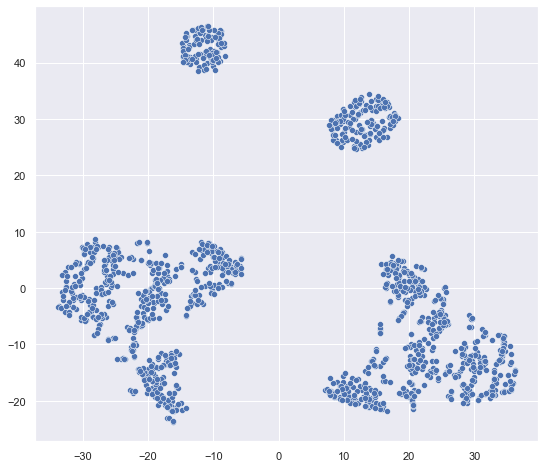

In [5]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0], y=vecs_list_tsne[:,1])

<AxesSubplot:>

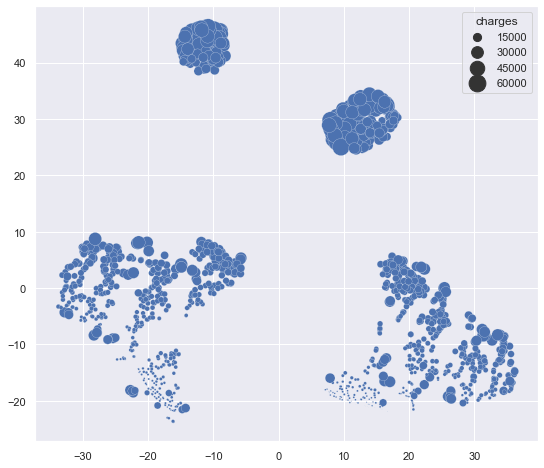

In [6]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0], y=vecs_list_tsne[:,1], size=data_insurance['charges'], sizes=(0, 300))

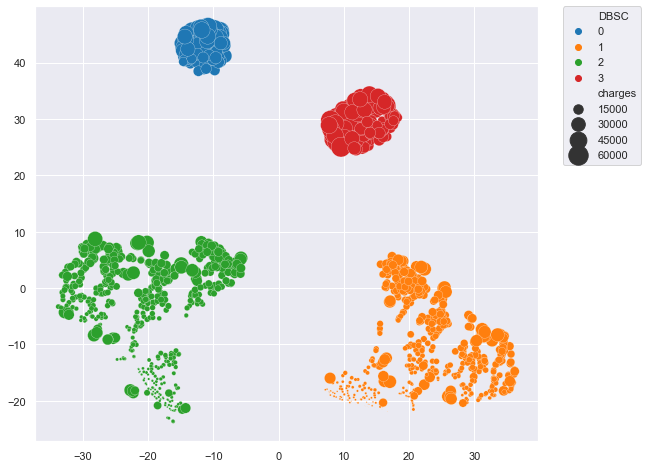

In [7]:
from sklearn.cluster import DBSCAN
components = pd.DataFrame(vecs_list_tsne, columns=['tsne1', 'tsne2'])
DBSCAN = DBSCAN(eps=3.8, min_samples=10)
DBSCAN.fit(components)

data_insurance["DBSC"] = DBSCAN.labels_

plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0],y=vecs_list_tsne[:,1],
                hue=data_insurance["DBSC"],alpha=1, palette='tab10',
                   sizes=(0, 400), size=data_insurance['charges'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [8]:
from math import inf
data_insurance["BMI"] = pd.cut(data_insurance.bmi,bins=[0, 30, inf], labels=["Non-obesity(BMI<30)", "Obesity(BMI>30)"])

data_insurance["smoker"] = data_insurance["smoker"].astype("category") 

data_insurance["sex"] = data_insurance["sex"].astype("category") 

In [43]:
import warnings
warnings.filterwarnings("ignore")

input_simulation = data_insurance[["charges", "sex", "BMI", "smoker"]]

input_simulation["smoker"] = input_simulation["smoker"].str.replace('no','Non-smoker')
input_simulation["smoker"] = input_simulation["smoker"].str.replace('yes','Smoker')

input_simulation["sex"] = input_simulation["sex"].str.replace('male','Male')
input_simulation["sex"] = input_simulation["sex"].str.replace('female','Female', case=False)

input_simulation["CategoricalClustering"] = input_simulation["smoker"].astype(str) + " & " + input_simulation["sex"].astype(str)

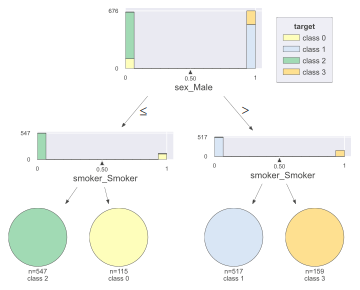

In [10]:
from dtreeviz.trees import dtreeviz # remember to load the package
from sklearn.tree import DecisionTreeClassifier

categorical = pd.get_dummies(input_simulation[["BMI", "sex", "smoker"]], drop_first=True)
numerical = data_insurance[["charges", "children", "age"]]
DecisionTree = DecisionTreeClassifier(max_leaf_nodes=None, criterion="entropy", random_state=0)

x = pd.concat([numerical, categorical], axis=1)
y = data_insurance["DBSC"]

DecisionTree.fit(x, y)

viz = dtreeviz(DecisionTree, x, y,
                target_name="target",
                feature_names=x.columns.values)

viz

# Prescription

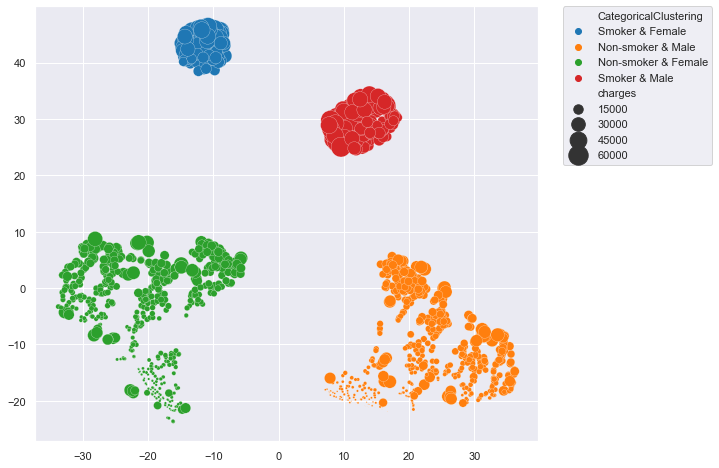

In [45]:
plt.figure(figsize=(9,8))
sns.scatterplot(x=vecs_list_tsne[:,0],y=vecs_list_tsne[:,1],
                hue=input_simulation["CategoricalClustering"],alpha=1, palette='tab10',
                   sizes=(0, 400), size=data_insurance['charges'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
data_insurance

,age,sex,bmi,children,smoker,region,charges,DBSC,BMI
0,19,female,27.900,0,yes,southwest,16884.92400,0,Non-obesity(BMI<30)
1,18,male,33.770,1,no,southeast,1725.55230,1,Obesity(BMI>30)
2,28,male,33.000,3,no,southeast,4449.46200,1,Obesity(BMI>30)
3,33,male,22.705,0,no,northwest,21984.47061,1,Non-obesity(BMI<30)
4,32,male,28.880,0,no,northwest,3866.85520,1,Non-obesity(BMI<30)
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,Obesity(BMI>30)
1334,18,female,31.920,0,no,northeast,2205.98080,2,Obesity(BMI>30)
1335,18,female,36.850,0,no,southeast,1629.83350,2,Obesity(BMI>30)
1336,21,female,25.800,0,no,southwest,2007.94500,2,Non-obesity(BMI<30)


In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

x = data_insurance["smoker"]
x = sm.add_constant(x)
y = data_insurance["charges"]

In [13]:
data_insurance

,age,sex,bmi,children,smoker,region,charges,DBSC,BMI
0,19,female,27.900,0,yes,southwest,16884.92400,0,Non-obesity(BMI<30)
1,18,male,33.770,1,no,southeast,1725.55230,1,Obesity(BMI>30)
2,28,male,33.000,3,no,southeast,4449.46200,1,Obesity(BMI>30)
3,33,male,22.705,0,no,northwest,21984.47061,1,Non-obesity(BMI<30)
4,32,male,28.880,0,no,northwest,3866.85520,1,Non-obesity(BMI<30)
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,Obesity(BMI>30)
1334,18,female,31.920,0,no,northeast,2205.98080,2,Obesity(BMI>30)
1335,18,female,36.850,0,no,southeast,1629.83350,2,Obesity(BMI>30)
1336,21,female,25.800,0,no,southwest,2007.94500,2,Non-obesity(BMI<30)


<AxesSubplot:ylabel='charges'>

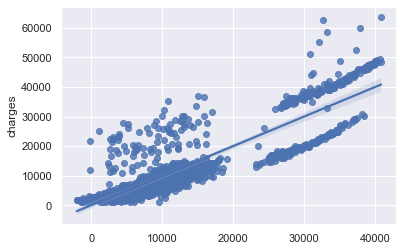

In [21]:
model = smf.ols(formula='charges ~ age + bmi + children + smoker + sex + region', data=data_insurance).fit()
summary = model.summary()

sns.regplot(x=model.fittedvalues, y=data_insurance['charges'], ci=100, n_boot=1000)

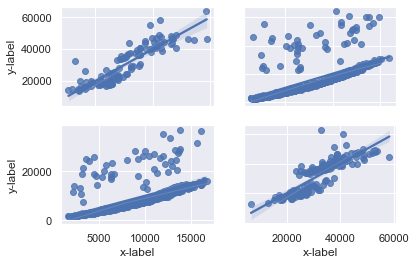

In [42]:
model_0 = smf.ols(formula='charges ~ age + bmi + children + smoker + sex + region', data=data_insurance.loc[data_insurance['DBSC']==0]).fit()
model_1 = smf.ols(formula='charges ~ age + bmi + children + smoker + sex + region', data=data_insurance.loc[data_insurance['DBSC']==1]).fit()
model_2 = smf.ols(formula='charges ~ age + bmi + children + smoker + sex + region', data=data_insurance.loc[data_insurance['DBSC']==2]).fit()
model_3 = smf.ols(formula='charges ~ age + bmi + children + smoker + sex + region', data=data_insurance.loc[data_insurance['DBSC']==3]).fit()


fig, axs = plt.subplots(2, 2)
axs[0, 0] = sns.regplot(ax=axs[0, 0], x=model_0.fittedvalues, 
                        y=data_insurance.loc[data_insurance['DBSC']==0]['charges'], ci=100, n_boot=1000)

axs[0, 1] = sns.regplot(ax=axs[0, 1], x=model_1.fittedvalues, 
                        y=data_insurance.loc[data_insurance['DBSC']==1]['charges'], ci=100, n_boot=1000)

axs[1, 0] = sns.regplot(ax=axs[1, 0], x=model_2.fittedvalues, 
                        y=data_insurance.loc[data_insurance['DBSC']==2]['charges'], ci=100, n_boot=1000)

axs[1, 1] = sns.regplot(ax=axs[1, 1], x=model_3.fittedvalues, 
                        y=data_insurance.loc[data_insurance['DBSC']==3]['charges'], ci=100, n_boot=1000)

axs[0, 0].set_title('Hierarchical Clustering')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

for ax in axs.flat:
    ax.label_outer()

In [39]:
axs[0, 0].show()

AttributeError: 'AxesSubplot' object has no attribute 'show'